In [1]:
## Importation of basic rotutine
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import ticker, cm
from scipy import linalg as LA
from math import sin, cos, pi, log
import cmath
import import_ipynb

## Importation of Spectral tools
from Spectral_tools import * #D1_CL, D2_CL,matrice_random, norm_2, Pseudospectrum



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

importing Jupyter notebook from Spectral_tools.ipynb


In [2]:

# Number of points n= N+1
#N = 100
def Matrix_Eigenvalues_Test(N, epsilon_Random_V):

    # Spectral Differentiation, identity and Zero matrices
    #xt = [D1_CL(N)[0]]
    xt = [D1_CG(N)[0]]
    x = np.transpose(xt)
    #D1 = D1_CL(N)[1]
    #D2 = D2_CL(N)[1]
    D1 = D1_CG(N)[1]
    D2 = D2_CG(N)[1]
    Id = np.eye(N+1)
    Id_total = np.eye(2*(N+1))
    Zero = np.zeros((N+1,N+1))

    ### Matrix L definition
    #L = D1
    #LT = L.transpose()
    #LTL = np.dot(LT,L)
    #L_red = L[1:N+1,1:N+1]
    
     # Potential
    V = 1.
    epsilon1 = 0.#1e-6
    epsilon2 = epsilon_Random_V
    epsilon3 = 0.#1e-6 
    NN=1e8
    V = 1. + epsilon1*np.cos((2*NN+1)/2.*pi*x)
    #V_random = matrice_random(N+1)
    V_random = Diagonal_Random_Matrix(N+1) - 0.5*Id
    V_random = V_random/norm_2(V_random)
    V_random = epsilon2 * V_random
    visualisation_matrix(V_random)
    #print("Random matrix : ", V_random)
    norm_V_random = norm_2(V_random)
    #V_random = epsilon2*matrice_random(N+1)
    print("L2-norm of Random_Matrix = " ,  norm_V_random, "\n")
    print("log_10 (L2-norm of Random_Matrix) = " , log(norm_V_random,10), "\n")
    
    #V_random_total = epsilon3*matrice_random(2*(N+1))

    # Elementary Operators Version 1
    #alpha, beta, gamma = 0., 0., 1.
    #print("alpha =", alpha, ", beta =", beta, ", gamma =", gamma)
    #V = alpha/(1-x**2) + beta*x/(1-x**2) + gamma + V_random/(1-x**2)
    #L1 = (1-x**2)*D2 - 2*x*D1 - V*Id #+ V_random
    #L2 = -2*x*D1 - Id
    #B = Id_total
    
    # Operator matrix
    #Lu = np.concatenate((Zero,Id), axis=1)
    #Ld = np.concatenate((L1,L2), axis=1)
    #L = np.concatenate((Lu,Ld), axis=0)
    #L += epsilon3*V_random_total
    
    # Elementary Operators Version 2
    alpha, beta, gamma = 0., 0., 1.
    print("alpha =", alpha, ", beta =", beta, ", gamma =", gamma)
    V = alpha + beta*x + gamma*(1-x**2) + V_random
    L1 = (1-x**2)*((1-x**2)*D2 - 2*x*D1) - V*Id #+ V_random
    L2 = (1-x**2)*(-2*x*D1 - Id)
    Bu = np.concatenate((Id,Zero), axis=1)
    Bd = np.concatenate((Zero,(1-x**2)*Id), axis=1)
    B = np.concatenate((Bu,Bd), axis=0)
    #print("B", B)
    
    # Operator matrix
    #L = [Zero, Id]
    Lu = np.concatenate((Zero,Id), axis=1)
    Ld = np.concatenate((L1,L2), axis=1)
    L = np.concatenate((Lu,Ld), axis=0)
    #L += epsilon3*V_random_total

    #print(L1)
    #print(L2)
    
     
    L = -1j*L
    
    
    ## Pseudospectrum parameters
    ############################
    # Grid
    xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = -40., 40., -10., 60., 50, 50
    #xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = -40., 40., -10., 60., 100, 100
    #xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = 0.86, 0.87, 0.495, 0.505, 50, 50
    #xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = -2., 2., -1., 20., 50, 50
    # Heights
    #heights = np.arange(0.0001, 0.001, 0.00025)
    heights = [1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-7,1e-5,1e-3,1e-1,1e0, 1e1]
    print("heights =", heights)
    # "Filled" (set fl to "f") or "Contour" (set fl to something different to "")
    fl = "f"
    print("fl = ", fl, "\n")
    Pseudospectrum(L,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl,log(norm_V_random,10))
    
    
    
    # Eigenvalues
    eigenvalues_L, eigenvectors_L = LA.eig(L,B)
    #eigenvalues_L = LA.eigvals(L,B)
    #eigenvalues_L, eigenvectors_L = LA.eig(LTL_test)
    #eigenvalues_L *= -1j
    
    print("\n Eigenvalues = \n", eigenvalues_L)

    
    eigenvalues_L_Re = eigenvalues_L.real
    eigenvalues_L_Im = eigenvalues_L.imag

    #print("Re(s_n) = ", eigenvalues_L_Re )
    #print("Im(s_n) = ", eigenvalues_L_Im )

    
    return eigenvalues_L_Re, eigenvalues_L_Im, eigenvectors_L, x, xt

    #print(D1_CL(N))
    #print(D1_CL(N)[0])
    #print(D1_CL(N)[1])

    #x_CL, D1_CL = D1_CL(N)
    #D2_CL = D2_CL(N)[1]
    #print("Chebyshev-Lobatto grid points = ", x_CL)
    #print("D1_CL = ", D1_CL)
    #print("D2_CL = ", D2_CL)

In [3]:
def Eigenvalues_Graphic(Re_lambda, Im_lambda):
    # Graphical ouput

    eigenvalues_L_Re, eigenvalues_L_Im = Re_lambda, Im_lambda
    
    #print(eigenvalues_L_Re)
    #print(eigenvalues_L_Im)
    
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    ax1.plot(eigenvalues_L_Re, eigenvalues_L_Im, "+")
    ax1.set_xlabel(r'$\mathrm{Re}(\omega_n)$')
    ax1.set_ylabel(r'$\mathrm{Im}(\omega_n)$')  
    #ax1.set_aspect('equal','datalim')
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%10e' % x))
    ax1.xaxis.set_major_formatter(mticker.FuncFormatter(g))
    ax1.yaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    fig1.suptitle(r'Eigenvalues of $L$ with $n=N+1=%5g$ points' %(N+1))
    ax1.grid()   
    #ax1.set_xlim(0.,500.)
    #ax1.set_ylim(-50.,50.)
    #ax1.axis([-10,10,-10,20])

    fig1.show()
    #fig.savefig("/home/jaramillo/Dropbox/Trabajo/Programacion/Python/Diagonalization/Eigenvalues_L.pdf")
    #fig1.savefig("Eigenvalues_PT_Random1e-5_1.pdf")
    

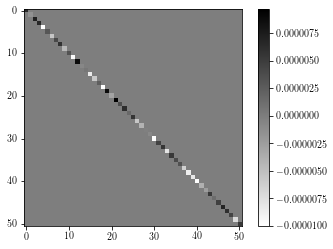

L2-norm of Random_Matrix =  1.0000000000000003e-05 

log_10 (L2-norm of Random_Matrix) =  -5.0 

alpha = 0.0 , beta = 0.0 , gamma = 1.0
heights = [1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-07, 1e-05, 0.001, 0.1, 1.0, 10.0]
fl =  f 



Spectral_tools.ipynb:311: UserWarning: The following kwargs were not used by contour: 'linewidth'
  "    \n",
Spectral_tools.ipynb:337: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  "    fig.suptitle(r'Spectrum and Pseudospectrum of $L$ with $log||\\mathrm{Random}||_2=%3g$' % log_norm_Random)\n",



 N =
 50.0

 Eigenvalues = 
 [-21.37675905+139.17043719j -21.36033274+137.38700811j
  21.37675932+139.17043709j  21.36033239+137.38700823j
 -53.31935254+116.33556378j -53.25964733+114.51287833j
  53.31935266+116.33556354j  53.25964715+114.51287861j
 -65.98241755 +87.54982165j -65.83874722 +85.66821372j
  65.9824175  +87.54982145j  65.83874721 +85.66821399j
 -65.95298205 +64.02423637j -65.69149763 +62.09040093j
  65.95298193 +64.02423627j  65.69149772 +62.09040111j
 -60.6942703  +47.45548848j -60.28622396 +45.47830183j
  60.69427019 +47.45548846j  60.28622407 +45.47830192j
 -54.1042986  +36.19288681j -53.50955362 +34.18902406j
  54.10429852 +36.19288682j  53.50955372 +34.18902411j
 -47.70897957 +28.43404422j -46.88013373 +26.45167048j
  47.70897952 +28.43404425j  46.88013381 +26.45167049j
 -41.9572627  +22.88769327j  41.95726266 +22.88769331j
 -40.87463875 +21.01789067j  40.87463883 +21.01789068j
 -36.86751618 +18.74925565j  36.86751616 +18.7492557j
 -35.57642506 +17.09162107j  35.5764

/home/jaramillo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


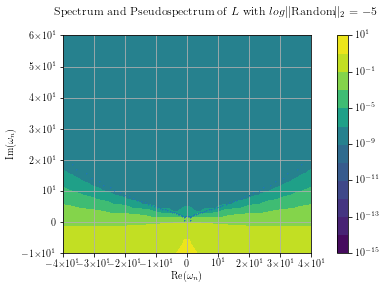

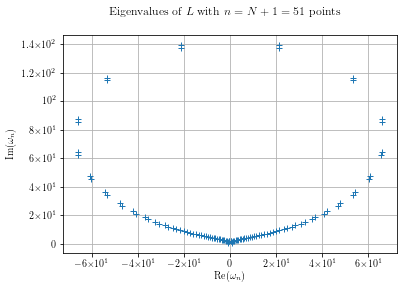

In [4]:
N=50
a, b, c, x, xt = Matrix_Eigenvalues_Test(N, 1e-5)
Eigenvalues_Graphic(a,b)